Random Sample Imputation

In [5]:
import pandas as pd
df = pd.read_csv('TatanicDataSet.csv', usecols=['Age', 'Fare', 'Survived'])

In [6]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [8]:
df['Age'].dropna().sample()

882    22.0
Name: Age, dtype: float64

In [9]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
def impute_NaN(df, variable , median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    


In [12]:
median = df['Age'].median()

28.0

In [19]:
impute_NaN(df, 'Age', median)

In [20]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

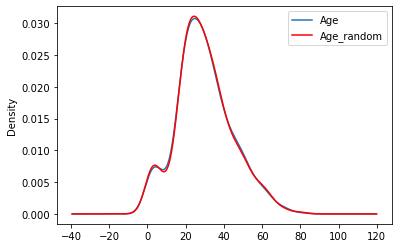

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
## distortion in variance is almost not there or less.